# IMPORT MODULES

In [196]:
import numpy as np # for text file data
from scipy.interpolate import interp1d # for interpolating points
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

# CREATE PSEUDOLANDMARKS

In [197]:
# define a function to return equally spaced, interpolated points

def interpolation(x, y, number): 

    distance = np.cumsum(np.sqrt( np.ediff1d(x, to_begin=0)**2 + np.ediff1d(y, to_begin=0)**2 ))
    distance = distance/distance[-1]

    fx, fy = interp1d( distance, x ), interp1d( distance, y )

    alpha = np.linspace(0, 1, number)
    x_regular, y_regular = fx(alpha), fy(alpha)
    
    return x_regular, y_regular

# define function to return equally spaced, interpolaated points
# given trace and landmark data

def get_pseudos(landmarks_file, trace_file, num_land):

    # find the corresponding trace coordinates for each landmark
    # record new landmark coord values
    # record landmark index values for trace values
    
    trace_xvals = trace_file[:,0] # specify trace xvals
    trace_yvals = trace_file[:,1] # specify trace yvals

    land_xvals = [] # list to store new landmark x vals
    land_yvals = [] # list to store new landmark y vals
    land_indices = [] # list to store index values

    for i in range(landmarks_file.shape[0]):

        landx = landmarks_file[i,0] # select current landmark
        landy = landmarks_file[i,1] 

        distances = [] # list to store distances of current landmark with each trace coord

        for j in range(len(trace_xvals)): # for each trace coord

            tracex = trace_xvals[j]
            tracey = trace_yvals[j]

            d = np.sqrt( (landx-tracex)**2 + (landy-tracey)**2 ) # find distance to each landmark

            distances.append(d) # append to distances

        min_val = np.min(distances) # find min distance value
        min_ind = distances.index(min_val) # find min index value among trace coords

        land_xvals.append(trace_xvals[min_ind]) # append new landmark coord and index vals
        land_yvals.append(trace_yvals[min_ind])
        land_indices.append(min_ind)

    # use landmark indices to find corresponding point on the outline
    # create two halves of the leaf

    base_ind = land_indices[0]
    tip_ind = land_indices[1]

    first_half_x = trace_file[base_ind:tip_ind, 0]
    first_half_y = trace_file[base_ind:tip_ind, 1]

    if tip_ind > base_ind:

        second_half_x = np.concatenate((trace_file[tip_ind:, 0], trace_file[0:base_ind, 0]), axis=None)
        second_half_y = np.concatenate((trace_file[tip_ind:, 1], trace_file[0:base_ind, 1]), axis=None)

    if tip_ind < base_ind:

        second_half_x = np.concatenate((trace_file[base_ind:, 0], trace_file[0:tip_ind, 0]), axis=None)
        second_half_y = np.concatenate((trace_file[base_ind:, 1], trace_file[0:tip_ind, 1]), axis=None)

    first_landx, first_landy = interpolation(first_half_x, first_half_y, num_land) # interpolate first half 
    second_landx, second_landy = interpolation(second_half_x, second_half_y, num_land) # interpolate second half

    return first_landx, first_landy, second_landx, second_landy


In [198]:
# read in data

A1trace = np.loadtxt("./1_shapes/A1.txt" ) # polyline outline trace
A1land = np.loadtxt("./2_landmarks/landA1.txt" ) # landmarks of base and tip

A2trace = np.loadtxt("./1_shapes/A2.txt" ) # polyline outline trace
A2land = np.loadtxt("./2_landmarks/landA2.txt" ) # landmarks of base and tip

A3trace = np.loadtxt("./1_shapes/A3.txt" ) # polyline outline trace
A3land = np.loadtxt("./2_landmarks/landA3.txt" ) # landmarks of base and tip

A4trace = np.loadtxt("./1_shapes/A4.txt" ) # polyline outline trace
A4land = np.loadtxt("./2_landmarks/landA4.txt" ) # landmarks of base and tip

B1trace = np.loadtxt("./1_shapes/B1.txt" ) # polyline outline trace
B1land = np.loadtxt("./2_landmarks/landB1.txt" ) # landmarks of base and tip

B2trace = np.loadtxt("./1_shapes/B2.txt" ) # polyline outline trace
B2land = np.loadtxt("./2_landmarks/landB2.txt" ) # landmarks of base and tip

B3trace = np.loadtxt("./1_shapes/B3.txt" ) # polyline outline trace
B3land = np.loadtxt("./2_landmarks/landB3.txt" ) # landmarks of base and tip

B4trace = np.loadtxt("./1_shapes/B4.txt" ) # polyline outline trace
B4land = np.loadtxt("./2_landmarks/landB4.txt" ) # landmarks of base and tip

C1trace = np.loadtxt("./1_shapes/C1.txt" ) # polyline outline trace
C1land = np.loadtxt("./2_landmarks/landC1.txt" ) # landmarks of base and tip

C2trace = np.loadtxt("./1_shapes/C2.txt" ) # polyline outline trace
C2land = np.loadtxt("./2_landmarks/landC2.txt" ) # landmarks of base and tip

C3trace = np.loadtxt("./1_shapes/C3.txt" ) # polyline outline trace
C3land = np.loadtxt("./2_landmarks/landC3.txt" ) # landmarks of base and tip

C4trace = np.loadtxt("./1_shapes/C4.txt" ) # polyline outline trace
C4land = np.loadtxt("./2_landmarks/landC4.txt" ) # landmarks of base and tip

D1trace = np.loadtxt("./1_shapes/D1.txt" ) # polyline outline trace
D1land = np.loadtxt("./2_landmarks/landD1.txt" ) # landmarks of base and tip

D2trace = np.loadtxt("./1_shapes/D2.txt" ) # polyline outline trace
D2land = np.loadtxt("./2_landmarks/landD2.txt" ) # landmarks of base and tip

D3trace = np.loadtxt("./1_shapes/D3.txt" ) # polyline outline trace
D3land = np.loadtxt("./2_landmarks/landD3.txt" ) # landmarks of base and tip

D4trace = np.loadtxt("./1_shapes/D4.txt" ) # polyline outline trace
D4land = np.loadtxt("./2_landmarks/landD4.txt" ) # landmarks of base and tip

trace_names = ["A1trace", "A2trace", "A3trace", "A4trace", "B1trace", "B2trace", "B3trace", "B4trace", 
              "C1trace", "C2trace", "C3trace", "C4trace", "D1trace", "D2trace", "D3trace", "D4trace"]

land_names = ["A1land", "A2land", "A3land", "A4land", "B1land", "B2land", "B3land", "B4land", 
              "C1land", "C2land", "C3land", "C4land", "D1land", "D2land", "D3land", "D4land"]


In [199]:
number = 30

aA1x, aA1y, bA1x, bA1y = get_pseudos(A1land, A1trace, number)
aA2x, aA2y, bA2x, bA2y = get_pseudos(A2land, A2trace, number)
aA3x, aA3y, bA3x, bA3y = get_pseudos(A3land, A3trace, number)
aA4x, aA4y, bA4x, bA4y = get_pseudos(A4land, A4trace, number)

aB1x, aB1y, bB1x, bB1y = get_pseudos(B1land, B1trace, number)
aB2x, aB2y, bB2x, bB2y = get_pseudos(B2land, B2trace, number)
aB3x, aB3y, bB3x, bB3y = get_pseudos(B3land, B3trace, number)
aB4x, aB4y, bB4x, bB4y = get_pseudos(B4land, B4trace, number)

aC1x, aC1y, bC1x, bC1y = get_pseudos(C1land, C1trace, number)
aC2x, aC2y, bC2x, bC2y = get_pseudos(C2land, C2trace, number)
aC3x, aC3y, bC3x, bC3y = get_pseudos(C3land, C3trace, number)
aC4x, aC4y, bC4x, bC4y = get_pseudos(C4land, C4trace, number)

aD1x, aD1y, bD1x, bD1y = get_pseudos(D1land, D1trace, number)
aD2x, aD2y, bD2x, bD2y = get_pseudos(D2land, D2trace, number)
aD3x, aD3y, bD3x, bD3y = get_pseudos(D3land, D3trace, number)
aD4x, aD4y, bD4x, bD4y = get_pseudos(D4land, D4trace, number)



(-129.33379185108964,
 2582.0068600777345,
 -160.42297890849724,
 3340.303077061109)

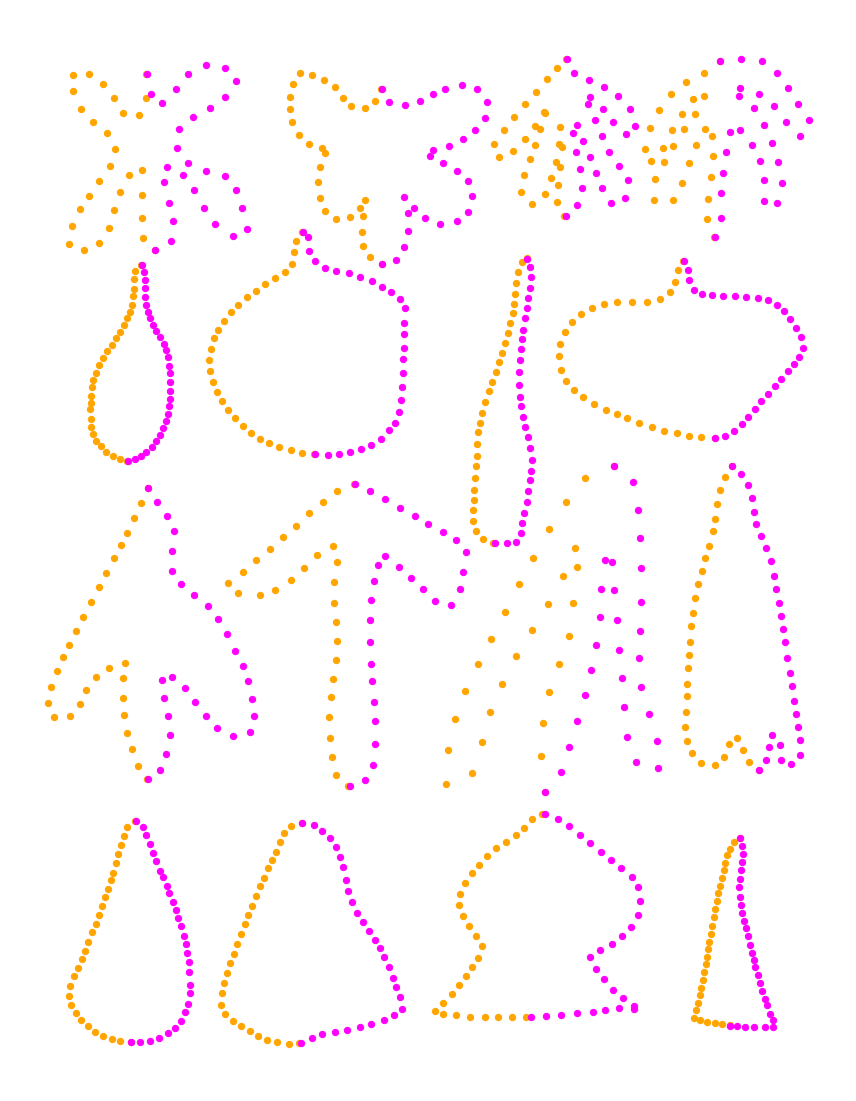

In [200]:
size = 40

plt.figure(figsize=(20,20))

plt.scatter(aA1x, aA1y, c="orange", s=size)
plt.scatter(bA1x, bA1y, c="magenta", s=size)
plt.scatter(aA2x, aA2y, c="orange", s=size)
plt.scatter(bA2x, bA2y, c="magenta", s=size)
plt.scatter(aA3x, aA3y, c="orange", s=size)
plt.scatter(bA3x, bA3y, c="magenta", s=size)
plt.scatter(aA4x, aA4y, c="orange", s=size)
plt.scatter(bA4x, bA4y, c="magenta", s=size)

plt.scatter(aB1x, aB1y, c="orange", s=size)
plt.scatter(bB1x, bB1y, c="magenta", s=size)
plt.scatter(aB2x, aB2y, c="orange", s=size)
plt.scatter(bB2x, bB2y, c="magenta", s=size)
plt.scatter(aB3x, aB3y, c="orange", s=size)
plt.scatter(bB3x, bB3y, c="magenta", s=size)
plt.scatter(aB4x, aB4y, c="orange", s=size)
plt.scatter(bB4x, bB4y, c="magenta", s=size)

plt.scatter(aC1x, aC1y, c="orange", s=size)
plt.scatter(bC1x, bC1y, c="magenta", s=size)
plt.scatter(aC2x, aC2y, c="orange", s=size)
plt.scatter(bC2x, bC2y, c="magenta", s=size)
plt.scatter(aC3x, aC3y, c="orange", s=size)
plt.scatter(bC3x, bC3y, c="magenta", s=size)
plt.scatter(aC4x, aC4y, c="orange", s=size)
plt.scatter(bC4x, bC4y, c="magenta", s=size)

plt.scatter(aD1x, aD1y, c="orange", s=size)
plt.scatter(bD1x, bD1y, c="magenta", s=size)
plt.scatter(aD2x, aD2y, c="orange", s=size)
plt.scatter(bD2x, bD2y, c="magenta", s=size)
plt.scatter(aD3x, aD3y, c="orange", s=size)
plt.scatter(bD3x, bD3y, c="magenta", s=size)
plt.scatter(aD4x, aD4y, c="orange", s=size)
plt.scatter(bD4x, bD4y, c="magenta", s=size)


plt.gca().set_aspect("equal")
plt.axis("off")

# PROCRUSTES ANALYSIS

In [201]:
# from https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421

from scipy.linalg import norm
import numpy as np
from math import atan
from math import sin, cos


def get_translation(shape):
  '''
  Calculates a translation for x and y
  axis that centers shape around the
  origin
  Args:
    shape(2n x 1 NumPy array) an array 
    containing x coodrinates of shape
    points as first column and y coords
    as second column
   Returns:
    translation([x,y]) a NumPy array with
    x and y translationcoordinates
  '''
  
  mean_x = np.mean(shape[::2]).astype(np.int)
  mean_y = np.mean(shape[1::2]).astype(np.int)
  
  return np.array([mean_x, mean_y])

def translate(shape):
  '''
  Translates shape to the origin
  Args:
    shape(2n x 1 NumPy array) an array 
    containing x coodrinates of shape
    points as first column and y coords
    as second column
  '''
  mean_x, mean_y = get_translation(shape)
  shape[::2] -= mean_x
  shape[1::2] -= mean_y
    
def get_rotation_matrix(theta):
    
    return np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

def scale(shape, scale):
    
    return shape / scale
    
def rotate(shape, theta):
    '''
    Rotates a shape by angle theta
    Assumes a shape is centered around 
    origin
    Args:
        shape(2nx1 NumPy array) an shape to be rotated
        theta(float) angle in radians
    Returns:
        rotated_shape(2nx1 NumPy array) a rotated shape
    '''
    
    matr = get_rotation_matrix(theta)
    
    #reshape so that dot product is eascily computed
    temp_shape = shape.reshape((-1,2)).T
    
    #rotate
    rotated_shape = np.dot(matr, temp_shape)
    
    return rotated_shape.T.reshape(-1)

def get_rotation_scale(reference_shape, shape):
    '''
    Calculates rotation and scale
    that would optimally align shape
    with reference shape
    Args:
        reference_shape(2nx1 NumPy array), a shape that
        serves as reference for scaling and 
        alignment
        
        shape(2nx1 NumPy array), a shape that is scaled
        and aligned
        
    Returns:
        scale(float), a scaling factor
        theta(float), a rotation angle in radians
    '''
    
    a = np.dot(shape, reference_shape) / norm(reference_shape)**2
    
    #separate x and y for the sake of convenience
    ref_x = reference_shape[::2]
    ref_y = reference_shape[1::2]
    
    x = shape[::2]
    y = shape[1::2]
    
    b = np.sum(x*ref_y - ref_x*y) / norm(reference_shape)**2
    
    scale = np.sqrt(a**2+b**2)
    theta = atan(b / max(a, 10**-10)) #avoid dividing by 0
    
    return round(scale,1), round(theta,2)

def procrustes_analysis(reference_shape, shape):
    '''
    Scales, and rotates a shape optimally to
    be aligned with a reference shape
    Args:
        reference_shape(2nx1 NumPy array), a shape that
        serves as reference alignment
        
        shape(2nx1 NumPy array), a shape that is aligned
        
    Returns:
        aligned_shape(2nx1 NumPy array), an aligned shape
        translated to the location of reference shape
    '''
    #copy both shapes in caseoriginals are needed later
    temp_ref = np.copy(reference_shape)
    temp_sh = np.copy(shape)
 
    translate(temp_ref)
    translate(temp_sh)
    
    #get scale and rotation
    scale, theta = get_rotation_scale(temp_ref, temp_sh)
    
    #scale, rotate both shapes
    temp_sh = temp_sh / scale
    aligned_shape = rotate(temp_sh, theta)
    
    return aligned_shape

def procrustes_distance(reference_shape, shape):
    
    ref_x = reference_shape[::2]
    ref_y = reference_shape[1::2]
    
    x = shape[::2]
    y = shape[1::2]
    
    dist = np.sum(np.sqrt((ref_x - x)**2 + (ref_y - y)**2))
    
    return dist

def generalized_procrustes_analysis(shapes):
    '''
    Performs superimposition on a set of 
    shapes, calculates a mean shape
    Args:
        shapes(a list of 2nx1 Numpy arrays), shapes to
        be aligned
    Returns:
        mean(2nx1 NumPy array), a new mean shape
        aligned_shapes(a list of 2nx1 Numpy arrays), super-
        imposed shapes
    '''
    #initialize Procrustes distance
    current_distance = 0
    
    #initialize a mean shape
    mean_shape = np.array(shapes[0])

    num_shapes = len(shapes)
    
    #create array for new shapes, add 
    new_shapes = np.zeros(np.array(shapes).shape)
    
    
    while True:
        
        #add the mean shape as first element of array
        new_shapes[0] = mean_shape
        
        #superimpose all shapes to current mean
        for sh in range(1, num_shapes):
            new_sh = procrustes_analysis(mean_shape, shapes[sh])
            new_shapes[sh] = new_sh
        
        #calculate new mean
        new_mean = np.mean(new_shapes, axis = 0)
        
        new_distance = procrustes_distance(new_mean, mean_shape)
        
        #if the distance did not change, break the cycle
        if new_distance == current_distance:
            break
        
        #align the new_mean to old mean
        new_mean = procrustes_analysis(mean_shape, new_mean)
        
        #update mean and distance
        mean_shape = new_mean
        current_distance = new_distance
        
    return mean_shape, new_shapes 

In [202]:
def get_shape(first_halfx, second_halfx, first_halfy, second_halfy):

    concat_x = np.concatenate((first_halfx, second_halfx), axis=None)
    concat_y = np.concatenate((first_halfy, second_halfy), axis=None)

    coordinates = []

    for i in range(len(concat_x)):

        xval = concat_x[i]
        yval = concat_y[i]

        coordinates.append(xval)
        coordinates.append(yval)

    return np.array(coordinates)

In [203]:
A1coords = get_shape(aA1x, bA1x, aA1y, bA1y)
A2coords = get_shape(aA2x, bA2x, aA2y, bA2y)
A3coords = get_shape(aA3x, bA3x, aA3y, bA3y)
A4coords = get_shape(aA4x, bA4x, aA4y, bA4y)

B1coords = get_shape(aB1x, bB1x, aB1y, bB1y)
B2coords = get_shape(aB2x, bB2x, aB2y, bB2y)
B3coords = get_shape(aB3x, bB3x, aB3y, bB3y)
B4coords = get_shape(aB4x, bB4x, aB4y, bB4y)

C1coords = get_shape(aC1x, bC1x, aC1y, bC1y)
C2coords = get_shape(aC2x, bC2x, aC2y, bC2y)
C3coords = get_shape(aC3x, bC3x, aC3y, bC3y)
C4coords = get_shape(aC4x, bC4x, aC4y, bC4y)

D1coords = get_shape(aD1x, bD1x, aD1y, bD1y)
D2coords = get_shape(aD2x, bD2x, aD2y, bD2y)
D3coords = get_shape(aD3x, bD3x, aD3y, bD3y)
D4coords = get_shape(aD4x, bD4x, aD4y, bD4y)

shape_list = [A1coords, A2coords, A3coords, A4coords,
             B1coords, B2coords, B3coords, B4coords,
             C1coords, C2coords, C3coords, C4coords,
             D1coords, D2coords, D3coords, D4coords]

In [204]:
mean_shape, new_shapes = generalized_procrustes_analysis(shape_list)

/Users/chitwood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/chitwood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

In [205]:
xshapes = []
yshapes = []

for i in range(16):
    
    curr_shape = new_shapes[i]
    curr_shapex = curr_shape[0::2]
    curr_shapey = curr_shape[1::2]
    
    xshapes.append(curr_shapex)
    yshapes.append(curr_shapey)
    

(-520.1623545267971, 519.4927525392687, -656.8552727141197, 807.9318707363356)

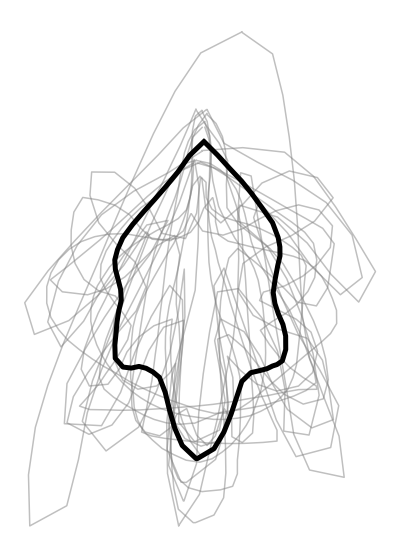

In [206]:
plt.figure(figsize=(10,10))

for i in range(16):

    plt.plot(xshapes[i], yshapes[i], c="gray", alpha=0.5)
    
meanx = mean_shape[0::2]
meany = mean_shape[1::2]
    
plt.plot(meanx, meany, c="black", lw=5)
plt.gca().set_aspect("equal")
plt.axis("off")

# PRINCIPAL COMPONENT ANALYSIS AND MORPHOSPACE

In [207]:
# Import the PCA function from scikitlearn

from sklearn.decomposition import PCA

In [208]:
# first see how much variance each PC explains

test_pca = PCA(n_components=16) # 16 leaf samples is the limiting number of PC axes

test_PCs = test_pca.fit_transform(new_shapes)

print(test_pca.explained_variance_ratio_)

print(test_pca.explained_variance_ratio_.cumsum())

[4.10318174e-01 2.74448660e-01 1.27254741e-01 9.27447287e-02
 3.54193224e-02 2.27844165e-02 1.50895037e-02 7.43390570e-03
 5.28881430e-03 4.18035316e-03 2.16010504e-03 1.38212549e-03
 1.18068419e-03 3.14465811e-04 4.73719337e-32 1.32983301e-35]
[0.41031817 0.68476683 0.81202157 0.9047663  0.94018563 0.96297004
 0.97805955 0.98549345 0.99078227 0.99496262 0.99712272 0.99850485
 0.99968553 1.         1.         1.        ]


Text(0, 0.5, 'PC2: 27%')

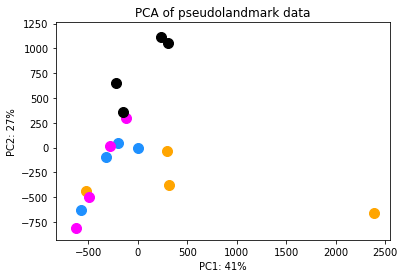

In [209]:
# Define the PCA function below, using two components (PC1 and PC2)

pca = PCA(n_components=2)

# Now apply the sklearn pca function with two components to the dataset

PCs = pca.fit_transform(new_shapes)

# The inverse transform function is applied

inverse_PCA = pca.inverse_transform(PCs)

colors = ["dodgerblue","dodgerblue","dodgerblue","dodgerblue",
         "orange","orange","orange","orange",
         "magenta","magenta","magenta","magenta",
         "black","black","black","black"]

plt.figure()

for i in range(16):
    
    plt.scatter(PCs[i][0], PCs[i][1], c= colors[i], s=100)
    
plt.title("PCA of pseudolandmark data")
plt.xlabel("PC1: 41%")
plt.ylabel("PC2: 27%")

In [210]:
# create PC values to calculate inverse leaves

pca_array = np.array([[-500,-1500],
[-500,-1000],
[-500,-500],
[-500,0],
[-500,500],
[-500,1000],
[-500,1500],

[0,-1500],
[0,-1000],
[0,-500],
[0,0],
[0,500],
[0,1000],
[0,1500],

[500,-1500],
[500,-1000],
[500,-500],
[500,0],
[500,500],
[500,1000],
[500,1500],

[1000,-1500],
[1000,-1000],
[1000,-500],
[1000,0],
[1000,500],
[1000,1000],
[1000,1500],

[1500,-1500],
[1500,-1000],
[1500,-500],
[1500,0],
[1500,500],
[1500,1000],
[1500,1500],

[2000,-1500],
[2000,-1000],
[2000,-500],
[2000,0],
[2000,500],
[2000,1000],
[2000,1500],

[2500,-1500],
[2500,-1000],
[2500,-500],
[2500,0],
[2500,500],
[2500,1000],
[2500,1500]])

In [211]:
# create inverse PCA

inv_new = pca.inverse_transform(pca_array)

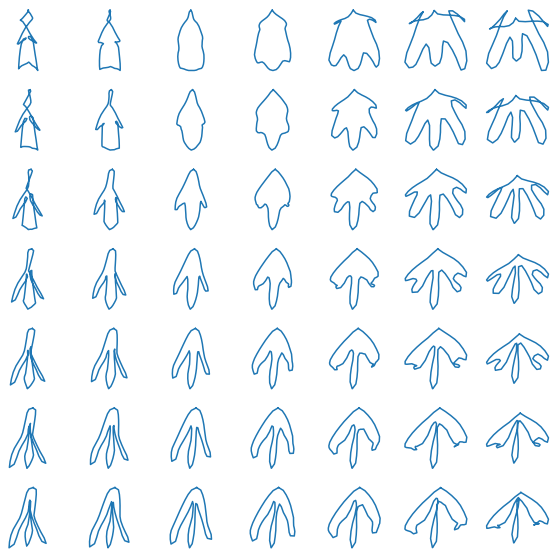

In [212]:
# plot out the morphospace

plt.figure(figsize=(10,10))

for i in range(len(inv_new)):
    
    current_shape = inv_new[i]
    curr_xvals = current_shape[0::2]
    curr_yvals = current_shape[1::2]
        
    num = i+1
        
    plt.subplot(7, 7, num)
    plt.plot(curr_xvals, curr_yvals)
    plt.gca().set_aspect("equal")
    plt.axis("off")
    